In [1]:
#!pip install tkinter
#!pip install termcolor
#!pip install datetime

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import tkinter as tk
from scipy.stats import linregress
from termcolor import colored
import requests, json, datetime, time, sys

In [3]:
#Straight answer: this is to take in input as a STRING and allow for 
coin_type = input("""What is the name of the coin you are searching for?\nYou can type out the FULL NAME of the coin
or you can use the quick set up. Keep in mind that this option will autofill the currency type.
[1] for Bitcoin (BTC)
[2] for Litecoin (LTC)
[3] for Ethereum (ETH)
""").lower()

What is the name of the coin you are searching for?
You can type out the FULL NAME of the coin
or you can use the quick set up. Keep in mind that this option will autofill the currency type.
[1] for Bitcoin (BTC)
[2] for Litecoin (LTC)
[3] for Ethereum (ETH)
1


In [4]:
## This is a Dictionary to accept a KEY integer as input (still taken in as a string) and return the VALUE string 
#  attached to it.
quick_keys = {'1': 'bitcoin', '2': 'litecoin', '3': 'ethereum'}

#This is checking for the integer used as a String, and calling the dictionary previously and has 3 or's
if coin_type == '1' or coin_type == "2" or coin_type == '3':
    coin_type = quick_keys[coin_type]
    # I stated in the input, if this IF is TRUE, then CURRENCY TYPE will be autocompleted.
    currency_type = 'usd'
# If the user did not pick an integer, then they will proceed to be asked to continue to input a currency type.
else:
    currency_type = input(colored('What currency type are you looking for: ', 'green')).lower()
                           # ^ WILL LET YOU ATTACH A COLOR TO TEXT WHEN YOU ADD ^

In [5]:
#Loop to check for an INTEGER input. Will break as soon as the time frame is an integer value
while True:
    #ooo a loop... how do I break it?
    #This try statement will continue so long as the input returns a ValueError... THAT SAID, I WOULD RATHER A CATCH ALL.
    try:
        #This is the TIME FRAME, this will take in how many days prior you would like to look back on.
        time_frame = int(input(colored("How far back would you like to look back?", 'green')))
        #This break will only occur IF AND ONLY IF (IFF) the user gives us an INTEGER and nothing else...
        break
    except ValueError:
        # Don't judge me. I thought this was hilarious at the time... I've been at this for about 10 hours now. 
        # It's awesome.
        print(colored("""                                MISTAKES WERE MADE!                                            

                      Input must be in the form of an INTEGER. Please try again.               """,
                      'red', attrs=['reverse', 'blink']))
        #PLEASE DON'T MESS WITH THE SPACING... THIS WAS 3 MINUTES I'LL NEVER GET BACK.

How far back would you like to look back?360


In [6]:
url = f'https://api.coingecko.com/api/v3/coins/{coin_type}/market_chart?vs_currency={currency_type}&days={time_frame}'
response = requests.get(url)
print(url)
#I printed this out because I think it's pretty cool how f strings are working for me and I don't have to use the
#.format tool... I love it D: *that's a sadface*

https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=360


In [7]:
print(colored(f"""You are looking for {coin_type.capitalize()}'s price, 
in {currency_type.upper()} in a time frame of {time_frame} days""", 'blue'))
#Despite how this will print out, no, it is not clickable... I tried.

You are looking for Bitcoin's price, 
in USD in a time frame of 360 days


In [8]:
## Oh boy, here comes the code that is harder to understand! Trust me, this is where I spent
## my evening debugging...

#This is the construction of the data for readability. YOU WILL HAVE QUESTIONS, IT'S OKAY TO ASK.
data_construct = response.json()
#This will check to see if the data construction is a dictionary with this and only this as its OUTPUT.
if data_construct == {"error":"Could not find coin with the given id"}:
    print(colored(f"""You goofed.\nThe Currency type: {coin_type} doesn't exist. 
    Please try again with the correct parameters.""", 'red', attrs=['reverse', 'blink']))
#This is another check to see if there is another error and give the correct reason to why the INPUT did not work.
elif data_construct == {'error': 'invalid vs_currency'}:
    print(colored(f"""You goofed.\nThe Currency type: {currency_type} doesn't exist. 
    Please try again with the correct parameters.""", 'red', attrs=['reverse', 'blink']))

In [9]:
#SO here's the explanation. CoinGecko.com will give us both the time and date together, as a UNIX EPOCH,
#which is normally easy to turn to normal time, but this is in MILISECONDS. Yeah, so when I found out I could
#just divide it by 1000, I was pretty livid. Needless to say, I was still happy that all the outputs work.

#Date_Time will take in a list of the date/time.
date_time = []
#value will take in a list of the values and save them.
value = []
#This is to set a baseline and convert the time to SECONDS from MILISECONDS. Will also allow for correct parameters later
date_time_seconds = []

In [10]:
#This FOR LOOP will go through the constructed data in the PRICES dataframe, which has 2 columns and separate 
#the two in the date_time and value LISTs. 
for row in data_construct['prices']:
    # (date_time) This one is confusing. First we are calling the variable date_time.
    # (.append) Next we are appending the list date_time
    # (datetime.datetime) This is tricky, don't ask. I'm not sure. I got the info from the library
    #      and this was how it was written.
    #      If I had to guess, it's the DATETIME library, using the DATETIME program... actually, I'm sure it is.
    # (utcfromtimestamp) This is looking at the COORDINATED UNIVERSAL TIME (UTC) function
    # (int(row[0]/1000)) Fun, this had me freaking out for about an hour. Ultimately, you need to ensure that
    #     ROW[0] is an INTEGER and NOT a FLOAT. Let's let that sink in.
    date_time.append(datetime.datetime.utcfromtimestamp(int(row[0]/1000)))
        #So, what this did, was take in all the information from the DATA_CONSTRUCTION variable and change 
        # The entire first element (row[0]) into YEAR/MONTH/DAY.TIME format.
    #This one just took the second element (row[1]) and appended it to value...
    value.append(row[1])
    #This is used to find slope. If you didn't do this, then the plot would be non-existent.
    date_time_seconds.append(int((row[0]/1000)))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


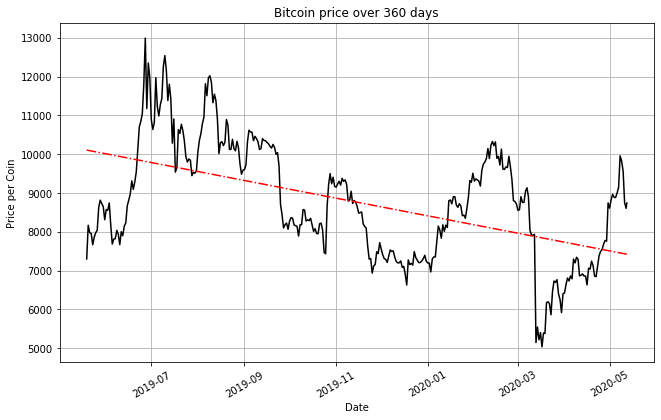

In [11]:
#BEWARE, IF YOU RUN THIS TWICE, THEN YOU WILL GET A PURPLE LINE THAT WILL JUST MESS YOU UP AND MY DATA. STOP IT!

# We want to give it a nice size, not too big though.
plt.figure(figsize=(9,6))
#SO, this was actually really nice to have and allowed the DATES to all appear in the PLOT
plt.xticks(rotation = 30)
#Everyone loves a good GRID.
plt.grid()
##NOTE: I'M NOT ENTIRELY SURE HOW I GOT THIS, BUT IT WORKS. ONLY CHANGE IT IF NOT COMMITTING CHANGES. 
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
#Time to make our PLOT
plt.plot(date_time, value, color = 'black')
#Give the thing a good TITLE
plt.title(f"Bitcoin price over {time_frame} days")
#and an X-LABEL
plt.xlabel('Date')
#Maybe we'll see it, probably not, but here's a Y-LABEL
plt.ylabel('Price per Coin')
#This is to plot LINEAR REGRESSION. This is where I found the real problem with the code and had to create 
#several work arounds in order to figure out the solution. Luckily, we had the best Hookah ever!
#NOTE: THIS CURRENTLY WORKS. DO NOT ATTEMPT TO MAKE CHANGES WITHOUT CHECKING DOCUMENTATION! REMEMBER: DOCUMENTATION!!!
regression = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(date_time_seconds, value)
regress_values = []
for i in date_time_seconds:
    regress_values.append(i * slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(date_time, regress_values,'-.', color = 'red')

In [12]:
pd.read_html('https://finance.yahoo.com/quote/%5EDJI/history/')[0]

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 12, 2020",24292.84,24382.09,23761.58,23764.78,23764.78,361561666
1,"May 11, 2020",24256.45,24366.21,24070.22,24221.99,24221.99,352400000
2,"May 08, 2020",24107.82,24349.90,24107.05,24331.32,24331.32,335760000
3,"May 07, 2020",23837.21,24094.62,23834.39,23875.89,23875.89,369890000
4,"May 06, 2020",23978.88,24054.59,23661.14,23664.64,23664.64,377450000
5,"May 05, 2020",23958.88,24169.72,23868.91,23883.09,23883.09,369710000
6,"May 04, 2020",23581.55,23769.56,23361.16,23749.76,23749.76,355360000
7,"May 01, 2020",24120.78,24120.78,23645.30,23723.69,23723.69,418160000
8,"Apr 30, 2020",24585.57,24585.57,24186.90,24345.72,24345.72,487840000
9,"Apr 29, 2020",24490.37,24764.77,24453.99,24633.86,24633.86,455290000


In [13]:

stock_market = pd.read_csv('stockmarket.csv')
stock_market


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-13,25568.060547,25568.060547,25222.509766,25324.990234,25324.990234,361240000
1,2019-05-14,25384.029297,25688.960938,25384.029297,25532.050781,25532.050781,291570000
2,2019-05-15,25400.130859,25724.890625,25341.939453,25648.019531,25648.019531,270720000
3,2019-05-16,25692.140625,25957.630859,25692.140625,25862.679688,25862.679688,320960000
4,2019-05-17,25719.949219,25948.740234,25657.779297,25764.000000,25764.000000,283760000
5,2019-05-20,25655.310547,25751.710938,25560.550781,25679.900391,25679.900391,279560000
6,2019-05-21,25782.339844,25898.269531,25779.609375,25877.330078,25877.330078,260870000
7,2019-05-22,25818.460938,25878.210938,25755.109375,25776.609375,25776.609375,241760000
8,2019-05-23,25657.990234,25657.990234,25328.089844,25490.470703,25490.470703,316940000
9,2019-05-24,25551.070313,25670.810547,25496.199219,25585.689453,25585.689453,201370000


In [14]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'])

stock_market.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [17]:
crypto_df = pd.DataFrame ( { "date" : date_time,
                      "price" : value })
                         
crypto_df

,date,price
0,2019-05-19 00:00:00,7300.655158
1,2019-05-20 00:00:00,8168.730690
2,2019-05-21 00:00:00,7976.851713
3,2019-05-22 00:00:00,7958.365526
4,2019-05-23 00:00:00,7665.796854
5,2019-05-24 00:00:00,7861.812792
6,2019-05-25 00:00:00,7977.244882
7,2019-05-26 00:00:00,8037.627432
8,2019-05-27 00:00:00,8631.080578
9,2019-05-28 00:00:00,8816.033915


In [20]:
 merged_df = pd.merge(crypto_df, stock_market, how= 'right', left_on= 'date' , right_on = 'Date' ).dropna()
 merged_df


,date,price,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,8168.730690,2019-05-20,25655.310547,25751.710938,25560.550781,25679.900391,25679.900391,279560000
1,2019-05-21,7976.851713,2019-05-21,25782.339844,25898.269531,25779.609375,25877.330078,25877.330078,260870000
2,2019-05-22,7958.365526,2019-05-22,25818.460938,25878.210938,25755.109375,25776.609375,25776.609375,241760000
3,2019-05-23,7665.796854,2019-05-23,25657.990234,25657.990234,25328.089844,25490.470703,25490.470703,316940000
4,2019-05-24,7861.812792,2019-05-24,25551.070313,25670.810547,25496.199219,25585.689453,25585.689453,201370000
5,2019-05-28,8816.033915,2019-05-28,25616.550781,25717.630859,25342.279297,25347.769531,25347.769531,358980000
6,2019-05-29,8726.978110,2019-05-29,25231.460938,25231.460938,24938.240234,25126.410156,25126.410156,298930000
7,2019-05-30,8650.677406,2019-05-30,25139.939453,25218.539063,25066.750000,25169.880859,25169.880859,215240000
8,2019-05-31,8310.891063,2019-05-31,25046.310547,25046.310547,24809.509766,24815.039063,24815.039063,292230000
9,2019-06-03,8743.705469,2019-06-03,24830.160156,24935.210938,24680.570313,24819.779297,24819.779297,328240000


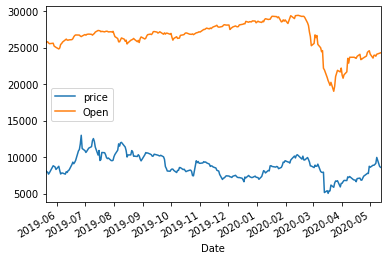

In [25]:
merged_df [['Date', 'price', 'Open']].plot(x= "Date")

